In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

/home/yannick/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [ ]:
im = cv2.imread('Data/frame0013.jpg',0)
def callback(x):
    pass
a = 0
cv2.namedWindow('image')
cv2.createTrackbar('filter','image',0,1000,callback)
cv2.createTrackbar('filter2','image',0,1000,callback)

while(True):
    edges= cv2.Canny(im,255,720) # a = 255, b = 720 
    ret, thresh = cv2.threshold(im, a, 255, cv2.THRESH_BINARY_INV)
    cv2.imshow("thresh",im)
    thresh_adapt = cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,115,1)
    #cv2.imshow("edge",thresh_adapt)
    #edges_a= cv2.Canny(thresh_adapt,a,b)
    cv2.imshow("image",edges)
    cv2.imwrite('edges.jpg',thresh_adapt)
    _, contours, hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    im2 = im.copy()
    
    objects = np.zeros([im.shape[0],im.shape[1],3], 'uint8')
    center_points = []
    for c in contours:
        area = cv2.contourArea(c)
        if area >= 1:
            cv2.drawContours(objects,[c],-1,(255,0,0),-1)

            M = cv2.moments(c)
            cx = int( M['m10']/M['m00'])
            cy = int( M['m01']/M['m00'])
            print "x ", cx, " y ", cy
            center_points.append((cx,cy))
            cv2.circle(objects,(cx,cy),4,(0,0,255),-1)
    print center_points
    cv2.imshow('objects',objects)
    cv2.imwrite('objects.jpg',objects)
    a = cv2.getTrackbarPos('filter','image')
    b = cv2.getTrackbarPos('filter2','image')
    key = cv2.waitKey(1) & 0xFFFF
    
    if key == 27:
        break;
cv2.waitKey(0)
cv2.destroyAllWindows()

x  488  y  325
x  488  y  325
x  305  y  328
x  304  y  328
x  208  y  332
x  208  y  332
x  107  y  341
x  482  y  321
x  482  y  322
x  395  y  325
x  395  y  325
x  58  y  312
x  230  y  130
x  296  y  111
x  453  y  114
x  283  y  103
[(488, 325), (488, 325), (305, 328), (304, 328), (208, 332), (208, 332), (107, 341), (482, 321), (482, 322), (395, 325), (395, 325), (58, 312), (230, 130), (296, 111), (453, 114), (283, 103)]
x  488  y  325
x  488  y  325
x  305  y  328
x  304  y  328
x  208  y  332
x  208  y  332
x  107  y  341
x  482  y  321
x  482  y  322
x  395  y  325
x  395  y  325
x  58  y  312
x  230  y  130
x  296  y  111
x  453  y  114
x  283  y  103
[(488, 325), (488, 325), (305, 328), (304, 328), (208, 332), (208, 332), (107, 341), (482, 321), (482, 322), (395, 325), (395, 325), (58, 312), (230, 130), (296, 111), (453, 114), (283, 103)]
x  488  y  325
x  488  y  325
x  305  y  328
x  304  y  328
x  208  y  332
x  208  y  332
x  107  y  341
x  482  y  321
x  482  y  322
x  

In [78]:
center_points = list(set(center_points))
print center_points
center_points = np.array(center_points)
print center_points


[(58, 312), (305, 328), (395, 325), (304, 328), (453, 114), (482, 321), (283, 103), (230, 130), (107, 341), (482, 322), (488, 325), (296, 111), (208, 332)]
[[ 58 312]
 [305 328]
 [395 325]
 [304 328]
 [453 114]
 [482 321]
 [283 103]
 [230 130]
 [107 341]
 [482 322]
 [488 325]
 [296 111]
 [208 332]]


In [94]:
def slope_function(x1,x2,y1,y2):
    if x2 != x1:
        return float(y2-y1)/float(x2-x1)
    else:
        return 0.
    
def distance_function(x1,x2,y1,y2):
    return np.sqrt((x2-x1)**2+(y2-y1)**2)

In [104]:
print center_points
length = 0
slopes = []
for i in xrange(len(center_points)):
    for j in xrange(len(center_points)):
        if j > i and center_points[i,0] != center_points[j,0]:
            #print center_points[j,0],center_points[i,0],center_points[j,1],center_points[i,1]
            slope = slope_function(center_points[j,1],center_points[i,1],center_points[j,0],center_points[i,0])
            distance = distance_function(center_points[j,0],center_points[i,0],center_points[j,1],center_points[i,1])
            if slope <= 1.0 and slope >= -1.0:
                slopes.append((round(slope,2),round(distance,2)))
                
slopes = np.array(slopes)
print "slopes", slopes
length /= 4
dist = int(length/2.0)+10
minimum = min(center_points[:,0])
maximum = max(center_points[:,0])
x_min = min(center_points[:,0])-dist if min(center_points[:,0])-dist > 0 else 0
x_max = max(center_points[:,0])+dist if max(center_points[:,0])+dist < im.shape[1] else im.shape[1]
y_min = min(center_points[:,1])-dist if min(center_points[:,1])-dist > 0 else 0
y_max = max(center_points[:,1])+dist if max(center_points[:,1])+dist < im.shape[0] else im.shape[0]
crop_tile = im[center_points[0,1]-dist:center_points[0,1]+dist,center_points[0,0]-dist:center_points[0,0]+dist]
crop= im[y_min:y_max,x_min:x_max]
cv2.imshow('objects',objects)
cv2.imshow("tile",crop_tile)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[ 58 312]
 [305 328]
 [395 325]
 [304 328]
 [453 114]
 [482 321]
 [283 103]
 [230 130]
 [107 341]
 [482 322]
 [488 325]
 [296 111]
 [208 332]]
slopes [[ -9.50000000e-01   2.50420000e+02]
 [  0.00000000e+00   1.00000000e+00]
 [ -6.90000000e-01   2.60190000e+02]
 [  1.00000000e-01   2.26070000e+02]
 [  3.80000000e-01   2.11730000e+02]
 [  4.00000000e-02   2.17190000e+02]
 [ -2.70000000e-01   2.18830000e+02]
 [  5.00000000e-01   2.48650000e+02]
 [  8.50000000e-01   2.55440000e+02]
 [  0.00000000e+00   9.30000000e+01]
 [  4.60000000e-01   2.35790000e+02]
 [ -7.00000000e-01   2.60760000e+02]
 [  9.00000000e-02   2.25980000e+02]
 [  3.70000000e-01   2.11380000e+02]
 [  4.00000000e-02   2.17150000e+02]
 [  1.40000000e-01   2.09020000e+02]
 [  1.40000000e-01   2.10010000e+02]
 [  1.70000000e-01   2.13880000e+02]
 [  9.10000000e-01   2.95170000e+02]
 [  8.90000000e-01   2.80530000e+02]
 [ -7.40000000e-01   2.96010000e+02]
 [  9.10000000e-01   2.95910000e+02]
 [  9.20000000e-01   3.02170000e+02

In [42]:
cv2.imshow("image",crop)
thresh_adapt = cv2.adaptiveThreshold(crop, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,115,1)
ret, thresh = cv2.threshold(crop, 200, 255, cv2.THRESH_BINARY_INV)
cv2.imshow("tresh", thresh)
cv2.imshow("adapt",thresh_adapt)
cv2.waitKey(0)
cv2.destroyAllWindows()


(480, 640, 3)


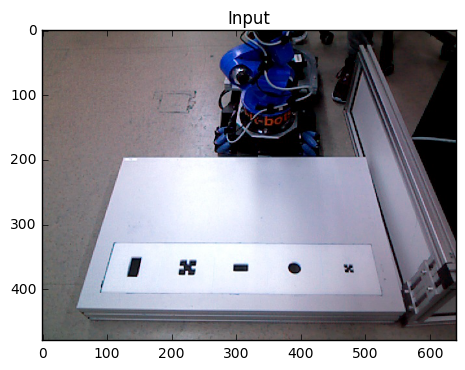

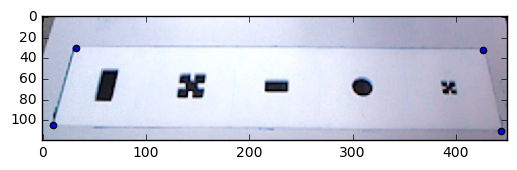

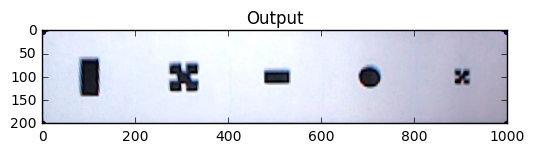

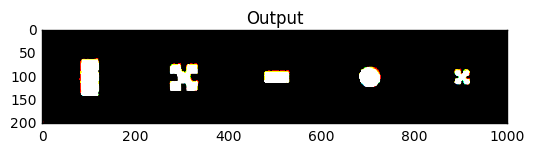

In [4]:
img = cv2.imread('Data/frame0024.jpg')
print img.shape
crop = img[300:420,80:530]
cv2.imwrite('cropped.jpg',crop)
rows,cols,ch = img.shape
plt.imshow(img),plt.title('Input')
plt.show()
pts1 = np.float32([[32,30],[426,32],[10,105],[444,110]])

plt.scatter(pts1[:,0],pts1[:,1])
plt.imshow(crop)
plt.show()

def homography(im,pts1):
    pts2 = np.float32([[0,0],[1000,0],[0,200],[1000,200]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(crop,M,(1000,200))
    cv2.imwrite('warped.jpg',dst)
    ret, thresh = cv2.threshold(dst, 120, 255, cv2.THRESH_BINARY_INV)
    #thresh_adapt = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,115,1)
    
    plt.scatter(pts2[:,0],pts2[:,1]),plt.imshow(dst),plt.title('Output')
    plt.show()
    plt.imshow(thresh),plt.title('Output')
    plt.show()

homography(crop,pts1)

In [26]:
def Contours(im):
    _, contours, hierarchy = cv2.findContours(im,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    im2 = im.copy()
    
    objects = np.zeros([im.shape[0],im.shape[1],3], 'uint8')
    center_points = []
    
    for c in contours:
        area = cv2.contourArea(c)
        if area >= 30000 and area <= 80000:
            cv2.drawContours(objects,[c],-1,(255,255,0),-1)
            M = cv2.moments(c)
            cx = int( M['m10']/M['m00'])
            cy = int( M['m01']/M['m00'])
            #print "x ", cx, " y ", cy
            center_points.append((cx,cy))
            #cv2.circle(objects,(cx,cy),4,(0,0,255),-1)
            
    print center_points
    
    cv2.imshow('objects',objects)
    return objects

In [28]:
im = cv2.imread('Data/frame0023.jpg',0)
centers = Contours(im)
adapt = cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,101,1)
centers = Contours(adapt)
median = cv2.medianBlur(adapt,3)
#centers = Contours(median)
cv2.imshow("image",median)
cv2.waitKey(0)
cv2.destroyAllWindows()

[]
[(136, 83)]


In [68]:
def corner_finding(im):
    corners = cv2.goodFeaturesToTrack(im,4,0.3,50)
    for c in corners:
        x,y = c.ravel()
        cv2.circle(im,(x,y),3,(255,0,0),-1)
    cv2.imshow("Corner",im)
    return corners

In [69]:
def callback(x):
    pass

a = 3
#cv2.namedWindow('image')
#cv2.createTrackbar('filter','image',3,1000,callback)

hsv = cv2.cvtColor(crop,cv2.COLOR_BGR2HSV)
gray  = cv2.cvtColor(crop,cv2.COLOR_BGR2GRAY)
r = crop[:,:,0]
g = crop[:,:,1]
b = crop[:,:,2]
adapt = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,51,1)
#a = cv2.getTrackbarPos('filter','image')
median = cv2.medianBlur(adapt,3)
gaussian = cv2.GaussianBlur(adapt,(3,3),0)
blur = cv2.blur(adapt,(5,5))
bila = cv2.bilateralFilter(adapt,9,75,75)

objects = Contours(adapt)
gray  = cv2.cvtColor(objects,cv2.COLOR_BGR2GRAY)

#cv2.imshow("image",adapt)
#cv2.imshow("median",median)
edges= cv2.Canny(median,100,720) # a = 255, b = 720 
#cv2.imshow("edges",edges)
#cv2.imshow("tile",hsv)
corner_finding(gray)
#h = hsv[:,:,0]
#s = hsv[:,:,1]
#v = hsv[:,:,2]
#cv2.imshow("h",h)
#cv2.imshow("s",s)
#cv2.imshow("v",v)
cv2.waitKey(0)
cv2.destroyAllWindows()

[(228, 69)]
